In [55]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [56]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
#Mentioning parameters for plot

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = 15.0

In [58]:
# reading uber request supply file

dfUber= pd.read_csv('Uber Request Data.csv')
dfUber.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [59]:
#metadata analysis

dfUber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


# 1 :Cleaning data

In [60]:
# finding dupliacte data
sum(dfUber.duplicated())

0

In [61]:
#finding null %
na_per=100*(dfUber.isnull().sum(axis=0)/len(dfUber.index))
na_per.round(2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

# 2. formating data time values

In [62]:
#changing object type of time date columns into datetime type
dfUber["Request timestamp"]=pd.to_datetime(dfUber["Request timestamp"], dayfirst=True)

dfUber["Drop timestamp"]=pd.to_datetime(dfUber["Drop timestamp"], dayfirst=True)

In [63]:
# derived columns of date and time for each timestamp columns
dfUber["Request time"]=dfUber["Request timestamp"].dt.time

dfUber["Request day"]=dfUber["Request timestamp"].dt.date

dfUber["Drop time"]=dfUber["Drop timestamp"].dt.time

dfUber["Drop day"]=dfUber["Drop timestamp"].dt.date

#dfUber.head(10)

# 3.EDA

In [64]:
# derieved column request hour
dfUber["Request hours"]=pd.to_datetime(dfUber["Request timestamp"]).dt.hour

In [65]:
# derived column "time slot" dividing day into section
dfUber.loc[(pd.to_datetime(dfUber["Request timestamp"]).dt.hour>=0) & (pd.to_datetime(dfUber["Request timestamp"]).dt.hour<=5) ,"time slots"]="Late Night"
dfUber.loc[(pd.to_datetime(dfUber["Request timestamp"]).dt.hour>5) & (pd.to_datetime(dfUber["Request timestamp"]).dt.hour<12) ,"time slots"]="Morning"
dfUber.loc[(pd.to_datetime(dfUber["Request timestamp"]).dt.hour>=12) & (pd.to_datetime(dfUber["Request timestamp"]).dt.hour<=15) ,"time slots"]="Afternoon"
dfUber.loc[(pd.to_datetime(dfUber["Request timestamp"]).dt.hour>15) &(pd.to_datetime(dfUber["Request timestamp"]).dt.hour<19) ,"time slots"]="Evening"
dfUber.loc[(pd.to_datetime(dfUber["Request timestamp"]).dt.hour>=19) &(pd.to_datetime(dfUber["Request timestamp"]).dt.hour<=21) ,"time slots"]="Late Evening"
dfUber.loc[(pd.to_datetime(dfUber["Request timestamp"]).dt.hour>21) & (pd.to_datetime(dfUber["Request timestamp"]).dt.hour<24) ,"time slots"]="Night"

In [66]:
dfUber["time slots"].isnull().sum()

0

In [67]:
#dataFrame for unsucceful status
dfUber1=dfUber[(dfUber["Status"]=="Cancelled") |(dfUber["Status"]=="No Cars Available")]

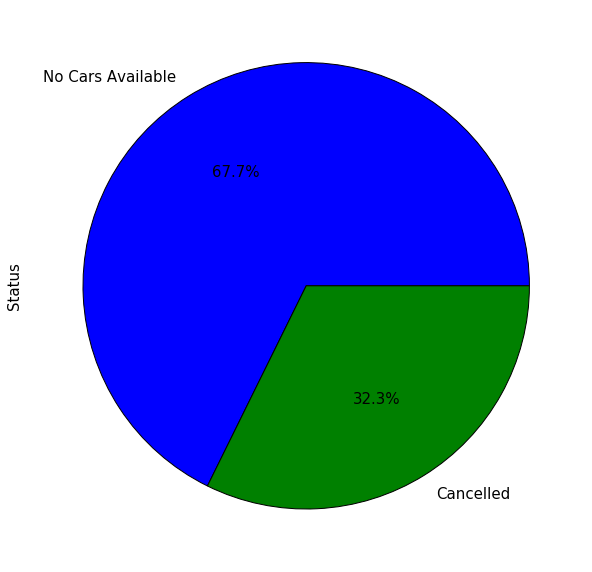

In [68]:
#frquency among unsucceful rides(Univariate Analysis)
dfUber1['Status'].value_counts().plot.pie(autopct='%1.1f%%')
#plt.savefig('Figure1' ,bbox_inches = 'tight')

RESULT 1:Non-Availability of Cars is major problem 

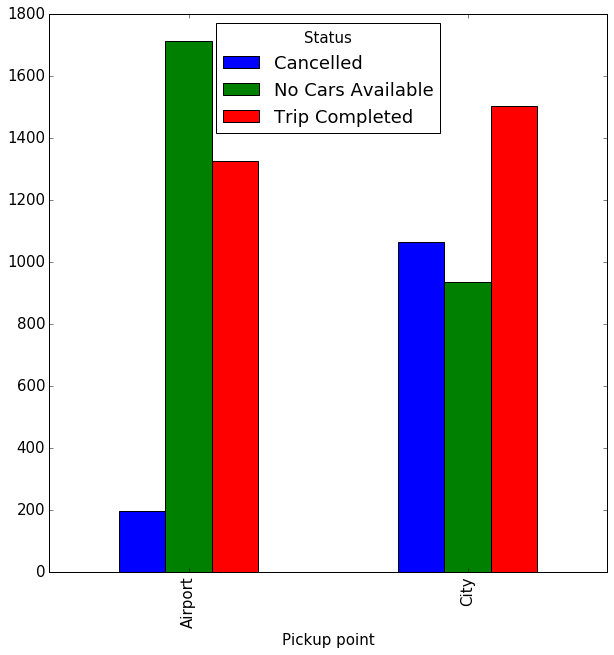

In [69]:
#identifying most problematic request
dfUber.groupby(['Pickup point'])['Status'].value_counts().unstack('Status').plot.bar()

plt.savefig('Figure2', bbox_inches = 'tight')


RESULT 2.1: Found that most problematic type request is from AirPort to City due to non-Availabity of cars.and next to it from city to airport due to cancellation.

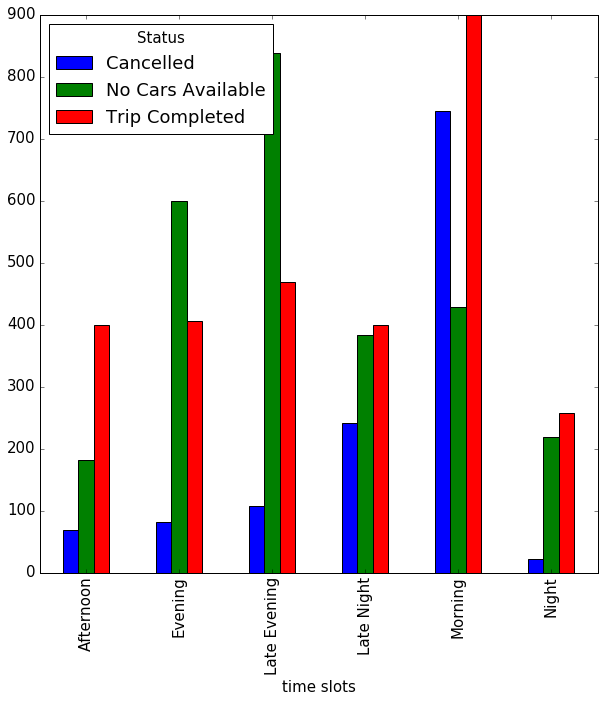

In [70]:
#Finding most problematic time slot
dfUber.groupby(['time slots'])['Status'].value_counts().unstack('Status').plot.bar()
plt.savefig('Figure3', bbox_inches = 'tight')

Result 2.2:Most Problematic time slot is "Late Evening"  due to no car availabity  and then "Morning" due to Cancellation.

In [104]:
#Total % of Supply demand gap
dfUber.loc[dfUber["Status"]=="Trip Completed","Supply"]="Fulfilled" # for completed trip Supply is 1
dfUber.loc[(dfUber["Status"]=="Cancelled") | (dfUber["Status"]=="No Cars Available"),"Supply"]="Not Fulfilled" #for uncompleted trip Supply is 0

#dfUber.to_csv('Uber.csv',sep=',',encoding='utf-8',index=False)
t=(len(dfUber.index)-(dfUber.Supply=="Fulfilled").sum())
print(100*(t/float(len(dfUber.index)))).round(2)

58.03


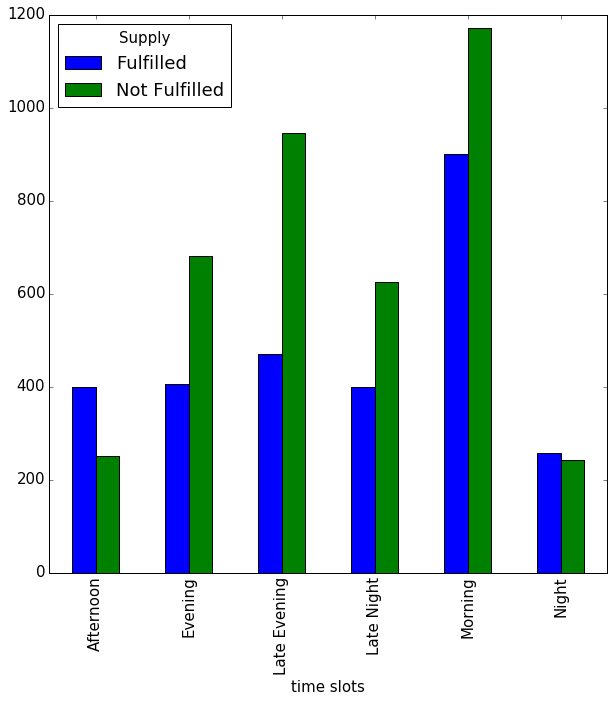

In [101]:
#bivariate analysis for Supply in various Timeslots
dfUber.groupby(["time slots"])["Supply"].value_counts().unstack("Supply").plot.bar()
plt.savefig('Figure5', bbox_inches = 'tight')

RESULT 3:Higest gap exist in "Late Evening" then in evening and morning.

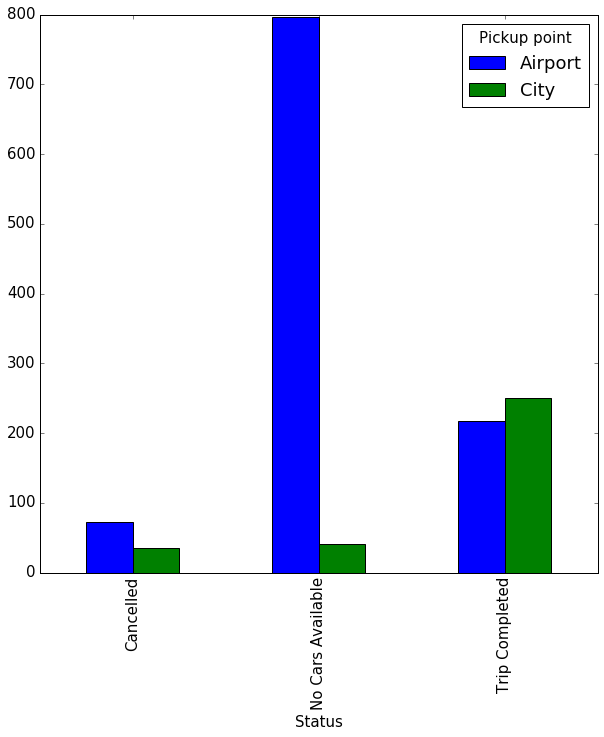

In [73]:
#In late evening from which pick point there is problem
filterdDf=dfUber[dfUber["time slots"]=="Late Evening"]
filterdDf.groupby(['Pickup point'])['Status'].value_counts().unstack("Pickup point").plot.bar()
plt.savefig('Figure6', bbox_inches = 'tight')

RESULT 4.1:In late Evening most problematic ride is from AirPort to city

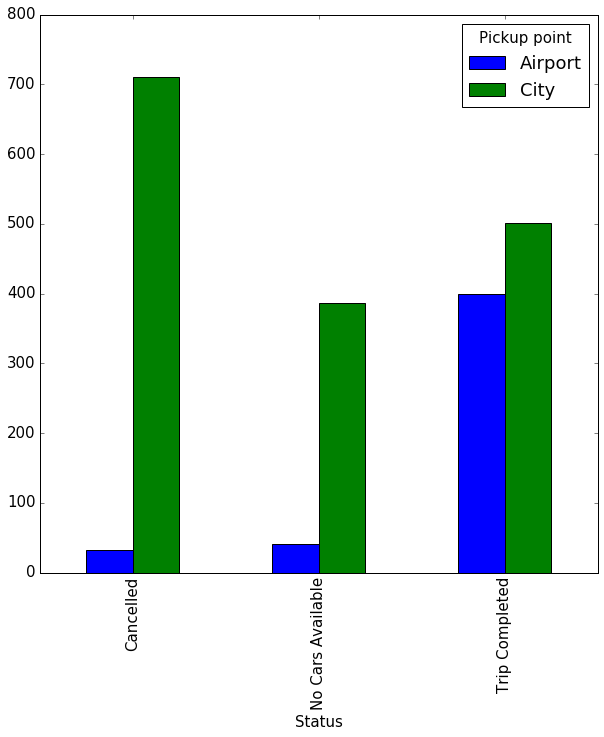

In [74]:
#Segmented Analysis
filterdDf=dfUber[dfUber["time slots"]=="Morning"]
filterdDf.groupby(['Pickup point'])['Status'].value_counts().unstack("Pickup point").plot.bar()
plt.savefig('Figure7', bbox_inches = 'tight')

RESULT 4.2:In morning there is most cancellation from city to Airport

RESULT4: As we can see Cancellation is maximum in morning from City to Airport and No Cars is available in Evening from Airport to City.

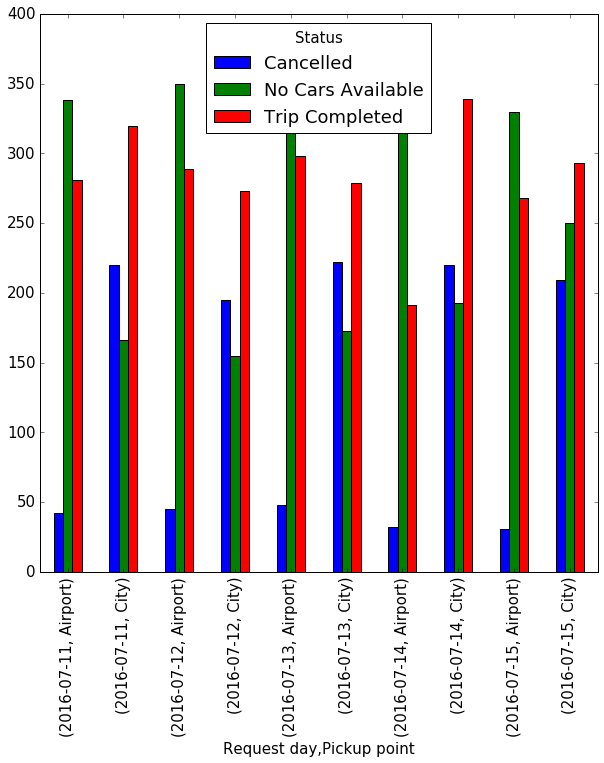

In [75]:
#Bivariate anaylsis
dfUber.groupby(['Request day',"Pickup point"])['Status'].value_counts().unstack("Status").plot.bar()
plt.savefig('Figure8', bbox_inches = 'tight')

At weekdays till friday there is problem of Non-availablity of Cars from Airport to City while trip completed and canclellation is same throughout the week from both pickup point.

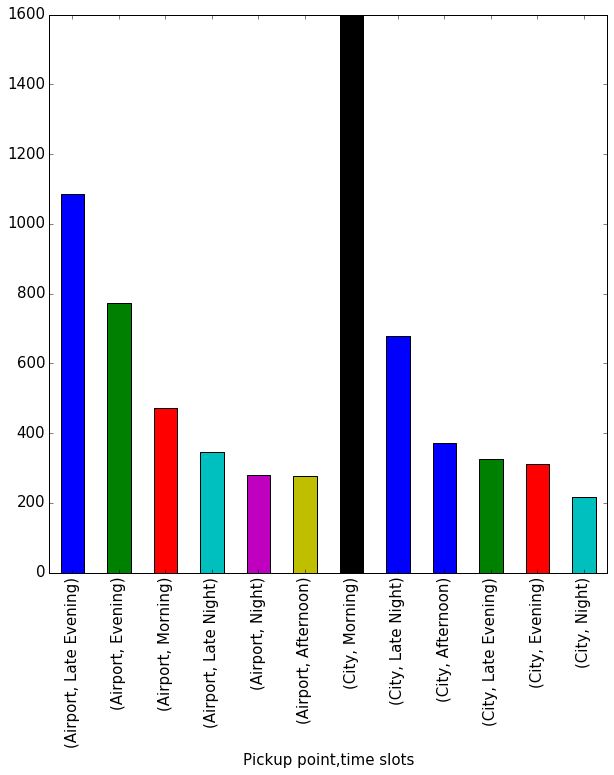

In [112]:
dfUber.groupby(["Pickup point"])['time slots'].value_counts().plot.bar()#max requests per time slots